## Creating CNN Using Scratch And Transfer Learning

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [9]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train'
valid_path = '/content/drive/MyDrive/Malaria-Detection-master/Dataset/Test'


In [10]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80150528/80134624 [==============================] - 1s 0us/step


In [11]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [12]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train/*')

In [13]:
folders

['/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train/Uninfected',
 '/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train/Parasite']

In [14]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


In [17]:
from tensorflow.keras.layers import MaxPooling2D

In [18]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [20]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [33]:
training_set

In [31]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [35]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 85s 6s/step - loss: 1.5914 - accuracy: 0.5433 - val_loss: 0.7584 - val_accuracy: 0.4328
Epoch 2/50
13/13 [==============================] - 22s 2s/step - loss: 0.5595 - accuracy: 0.7019 - val_loss: 0.8013 - val_accuracy: 0.4552
Epoch 3/50
13/13 [==============================] - 22s 2s/step - loss: 0.5550 - accuracy: 0.7115 - val_loss: 1.0393 - val_accuracy: 0.3806
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.4793 - accuracy: 0.7692 - val_loss: 1.0891 - val_accuracy: 0.3955
Epoch 5/50
13/13 [==============================] - 22s 2s/step - loss: 0.4426 - accuracy: 0.7909 - val_loss: 0.8918 - val_accuracy: 0.3806
Epoch 6/50
13/13 [==============================] - 22s 2s/step - loss: 0.4034 - accuracy: 0.8197 - val_loss: 1.0965 - val_accuracy: 0.4030
Epoch 7/50
13/13 [==============================] - 22s 2s/step - loss: 0.3989 - accuracy: 0.8125 - val_loss: 0.8357 - val_accuracy: 0.5075
Epoch 8/50
13/13 [==

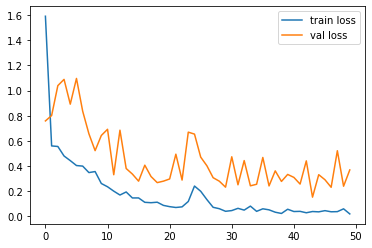

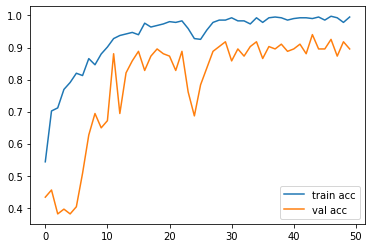

<Figure size 432x288 with 0 Axes>

In [36]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [37]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [38]:

y_pred = model.predict(test_set)


In [39]:
y_pred

array([[6.31116509e-01, 3.68883520e-01],
       [9.99988079e-01, 1.18910102e-05],
       [1.00000000e+00, 2.55884358e-09],
       [9.99019742e-01, 9.80250654e-04],
       [1.52404176e-03, 9.98475969e-01],
       [2.56154197e-03, 9.97438431e-01],
       [3.59873194e-03, 9.96401310e-01],
       [3.04652285e-02, 9.69534814e-01],
       [1.60560594e-03, 9.98394430e-01],
       [9.99999762e-01, 2.36088695e-07],
       [2.33934331e-03, 9.97660637e-01],
       [1.81567750e-03, 9.98184264e-01],
       [9.99967456e-01, 3.25681940e-05],
       [1.00000000e+00, 2.33630355e-11],
       [9.99888182e-01, 1.11772286e-04],
       [7.34014437e-04, 9.99265969e-01],
       [9.99900937e-01, 9.90547342e-05],
       [9.99432623e-01, 5.67384122e-04],
       [9.99925852e-01, 7.41918993e-05],
       [9.97543335e-01, 2.45669833e-03],
       [9.99991059e-01, 8.89615239e-06],
       [1.00000000e+00, 1.60960164e-22],
       [2.62322575e-02, 9.73767757e-01],
       [1.19363691e-03, 9.98806357e-01],
       [1.000000

In [40]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [41]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0])

In [42]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [43]:
model=load_model('model_vgg19.h5')

In [47]:
img=image.load_img('/content/drive/MyDrive/Malaria-Detection-master/Dataset/Train/Uninfected/C1_thinF_IMG_20150604_104722_cell_115.png',target_size=(224,224))



In [48]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [49]:
x.shape

(224, 224, 3)

In [50]:
x=x/255

In [51]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
model.predict(img_data)

array([[0., 1.]], dtype=float32)

In [53]:
a=np.argmax(model.predict(img_data), axis=1)

In [54]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
